In [2]:
import pandas as pd
import numpy as np

#Reports
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik
import shap


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Class
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


<b>Data Frame</b>

In [27]:
df = pd.read_csv("clean_Zillow.csv")
df.head()



longitude  countyFIPS  monthlyHoaFee  annualHomeownersInsurance state  \
0 -149.90807    2020.0         0.0                 2840              AK    
1 -149.90822    2020.0         0.0                 2934              AK    
2 -149.90833    2020.0         0.0                 4187              AK    
3 -149.90834    2020.0         0.0                 2920              AK    
4 -149.90749    2020.0         0.0                 4100              AK    

   yearBuilt  latitude   rentZestimate    city     zestimateLowPercent  \
0   1959.0    61.217308     3142.0      Anchorage         12.0           
1   1961.0    61.217136     3113.0      Anchorage         12.0           
2   1983.0    61.217000     4282.0      Anchorage         12.0           
3   1947.0    61.216720     3458.0      Anchorage         15.0           
4   2000.0    61.217120     4161.0      Anchorage         18.0           

   timeOnZillow  zestimate  livingArea  zipcode  propertyTaxRate  bathrooms  \
0     3609.0     676100.0     2668.0     99501        1.31           2.0      
1     2098.0     698600.0     3179.0     99501        1.31           2.0      
2     3758.0     996800.0     3059.0     99501        1.31           3.0      
3     3543.0     695300.0     1642.0     99501        1.31           2.0      
4     3953.0     976100.0     4483.0     99501        1.31           4.0      

   bedrooms   price  zestimateHighPercent  homeType_APARTMENT  homeType_CONDO  \
0     3.0    676100          13.0                   0                 0         
1     3.0    698600          13.0                   0                 0         
2     4.0    996800          14.0                   0                 0         
3     5.0    695300          16.0                   0                 0         
4     4.0    976100          24.0                   0                 1         

   homeType_LOT  homeType_MANUFACTURED  homeType_MULTI_FAMILY  \
0        0                 0                      0             
1        0                 0                      0             
2        0                 0                      0             
3        0                 0                      0             
4        0                 0                      0             

   homeType_SINGLE_FAMILY  
0             1            
1             1            
2             1            
3             1            
4             0

<b>Already edited</b>

In [28]:
dropable=["state","city",'yearBuilt','zestimateLowPercent','zestimate','rentZestimate','zestimateHighPercent','latitude','countyFIPS','timeOnZillow']
df=df.drop(dropable,axis=1)

X = df.drop(["price"], axis=1)
y = df['price']

sparse_columns = ['homeType_LOT', 'homeType_MANUFACTURED', 'homeType_APARTMENT','homeType_MULTI_FAMILY']

# Create a new 'Other' column that combines the sparse categories
df['homeType_OTHER'] = df[sparse_columns].sum(axis=1)

# Drop the original sparse columns
df = df.drop(columns=sparse_columns)

<b>Y Data</b>

In [29]:
report = ProfileReport(df, title='Zillow Data')
report.to_file("ydata_Zillow.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>AutoViz</b>

Shape of your Data Set loaded: (4943, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    25 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

Number of All Scatter Plots = 105


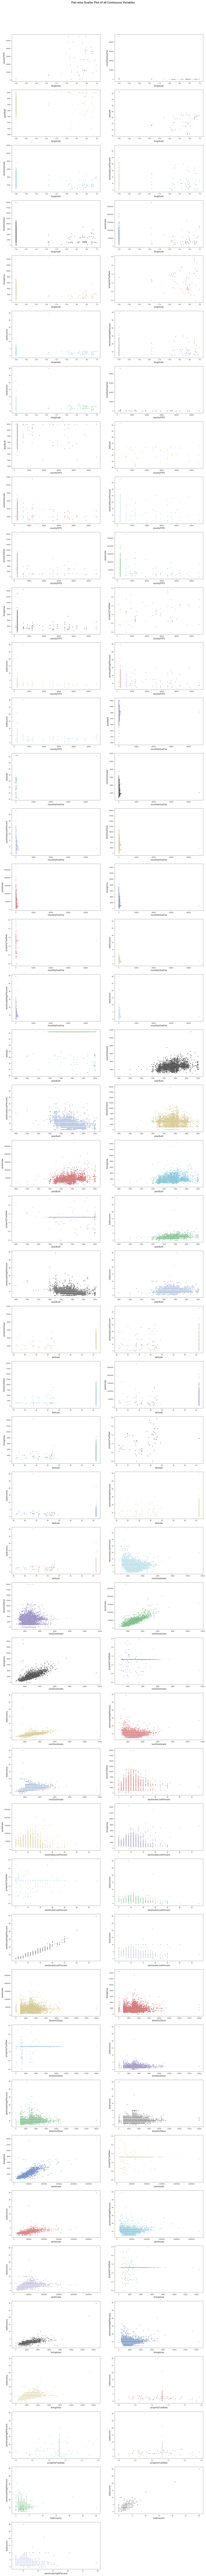

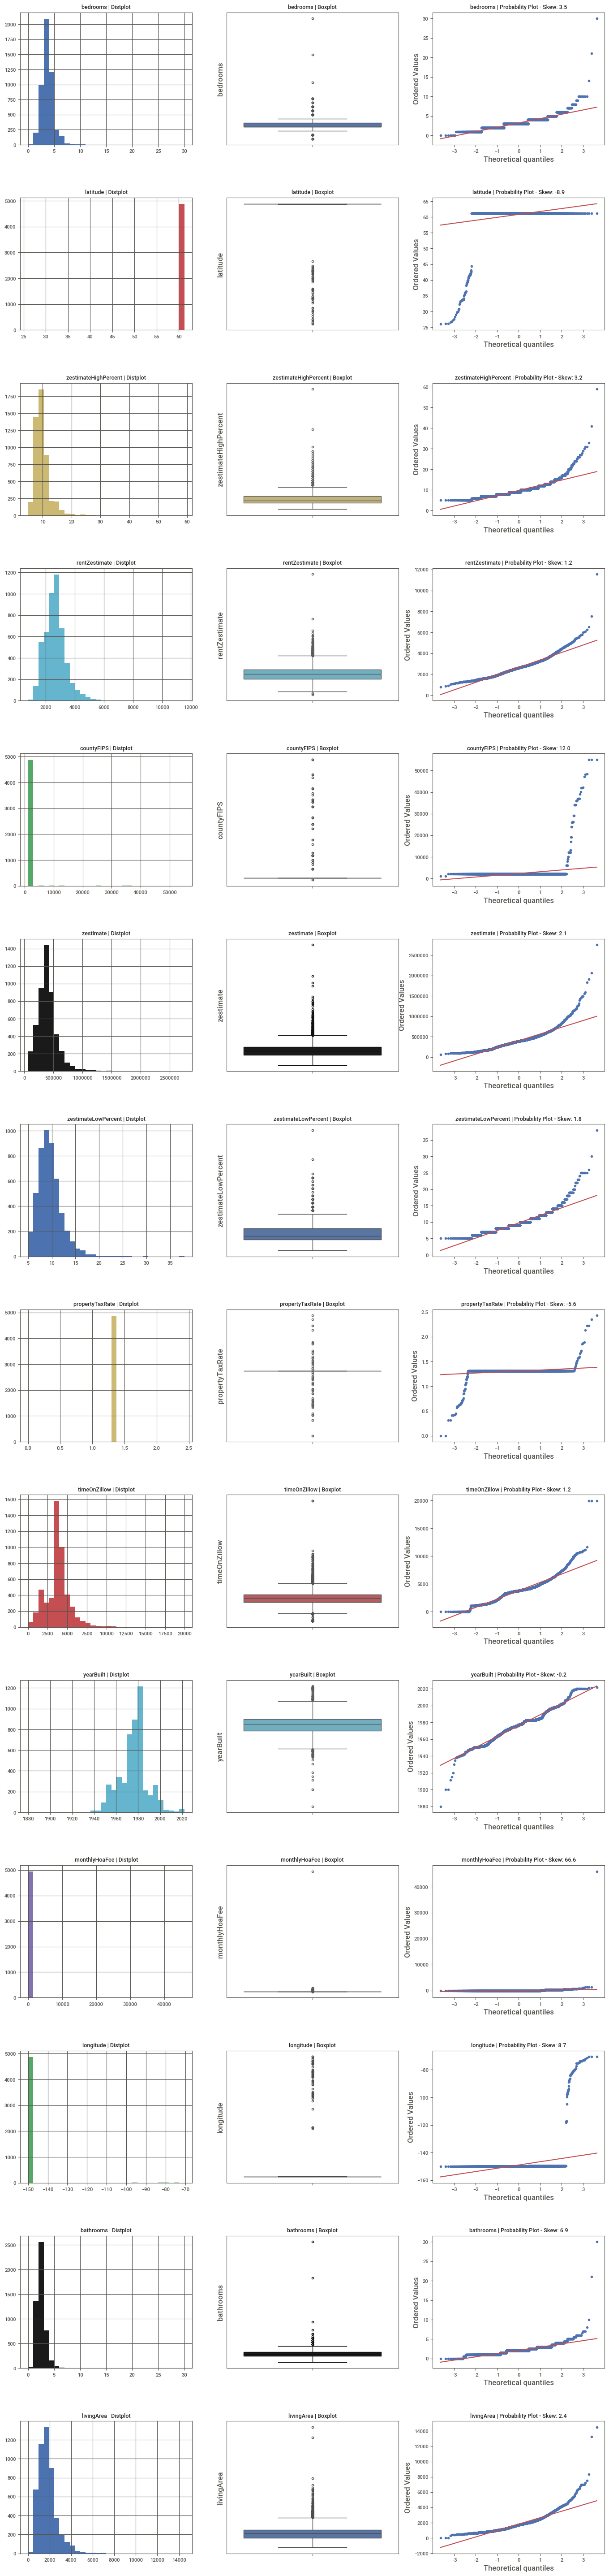

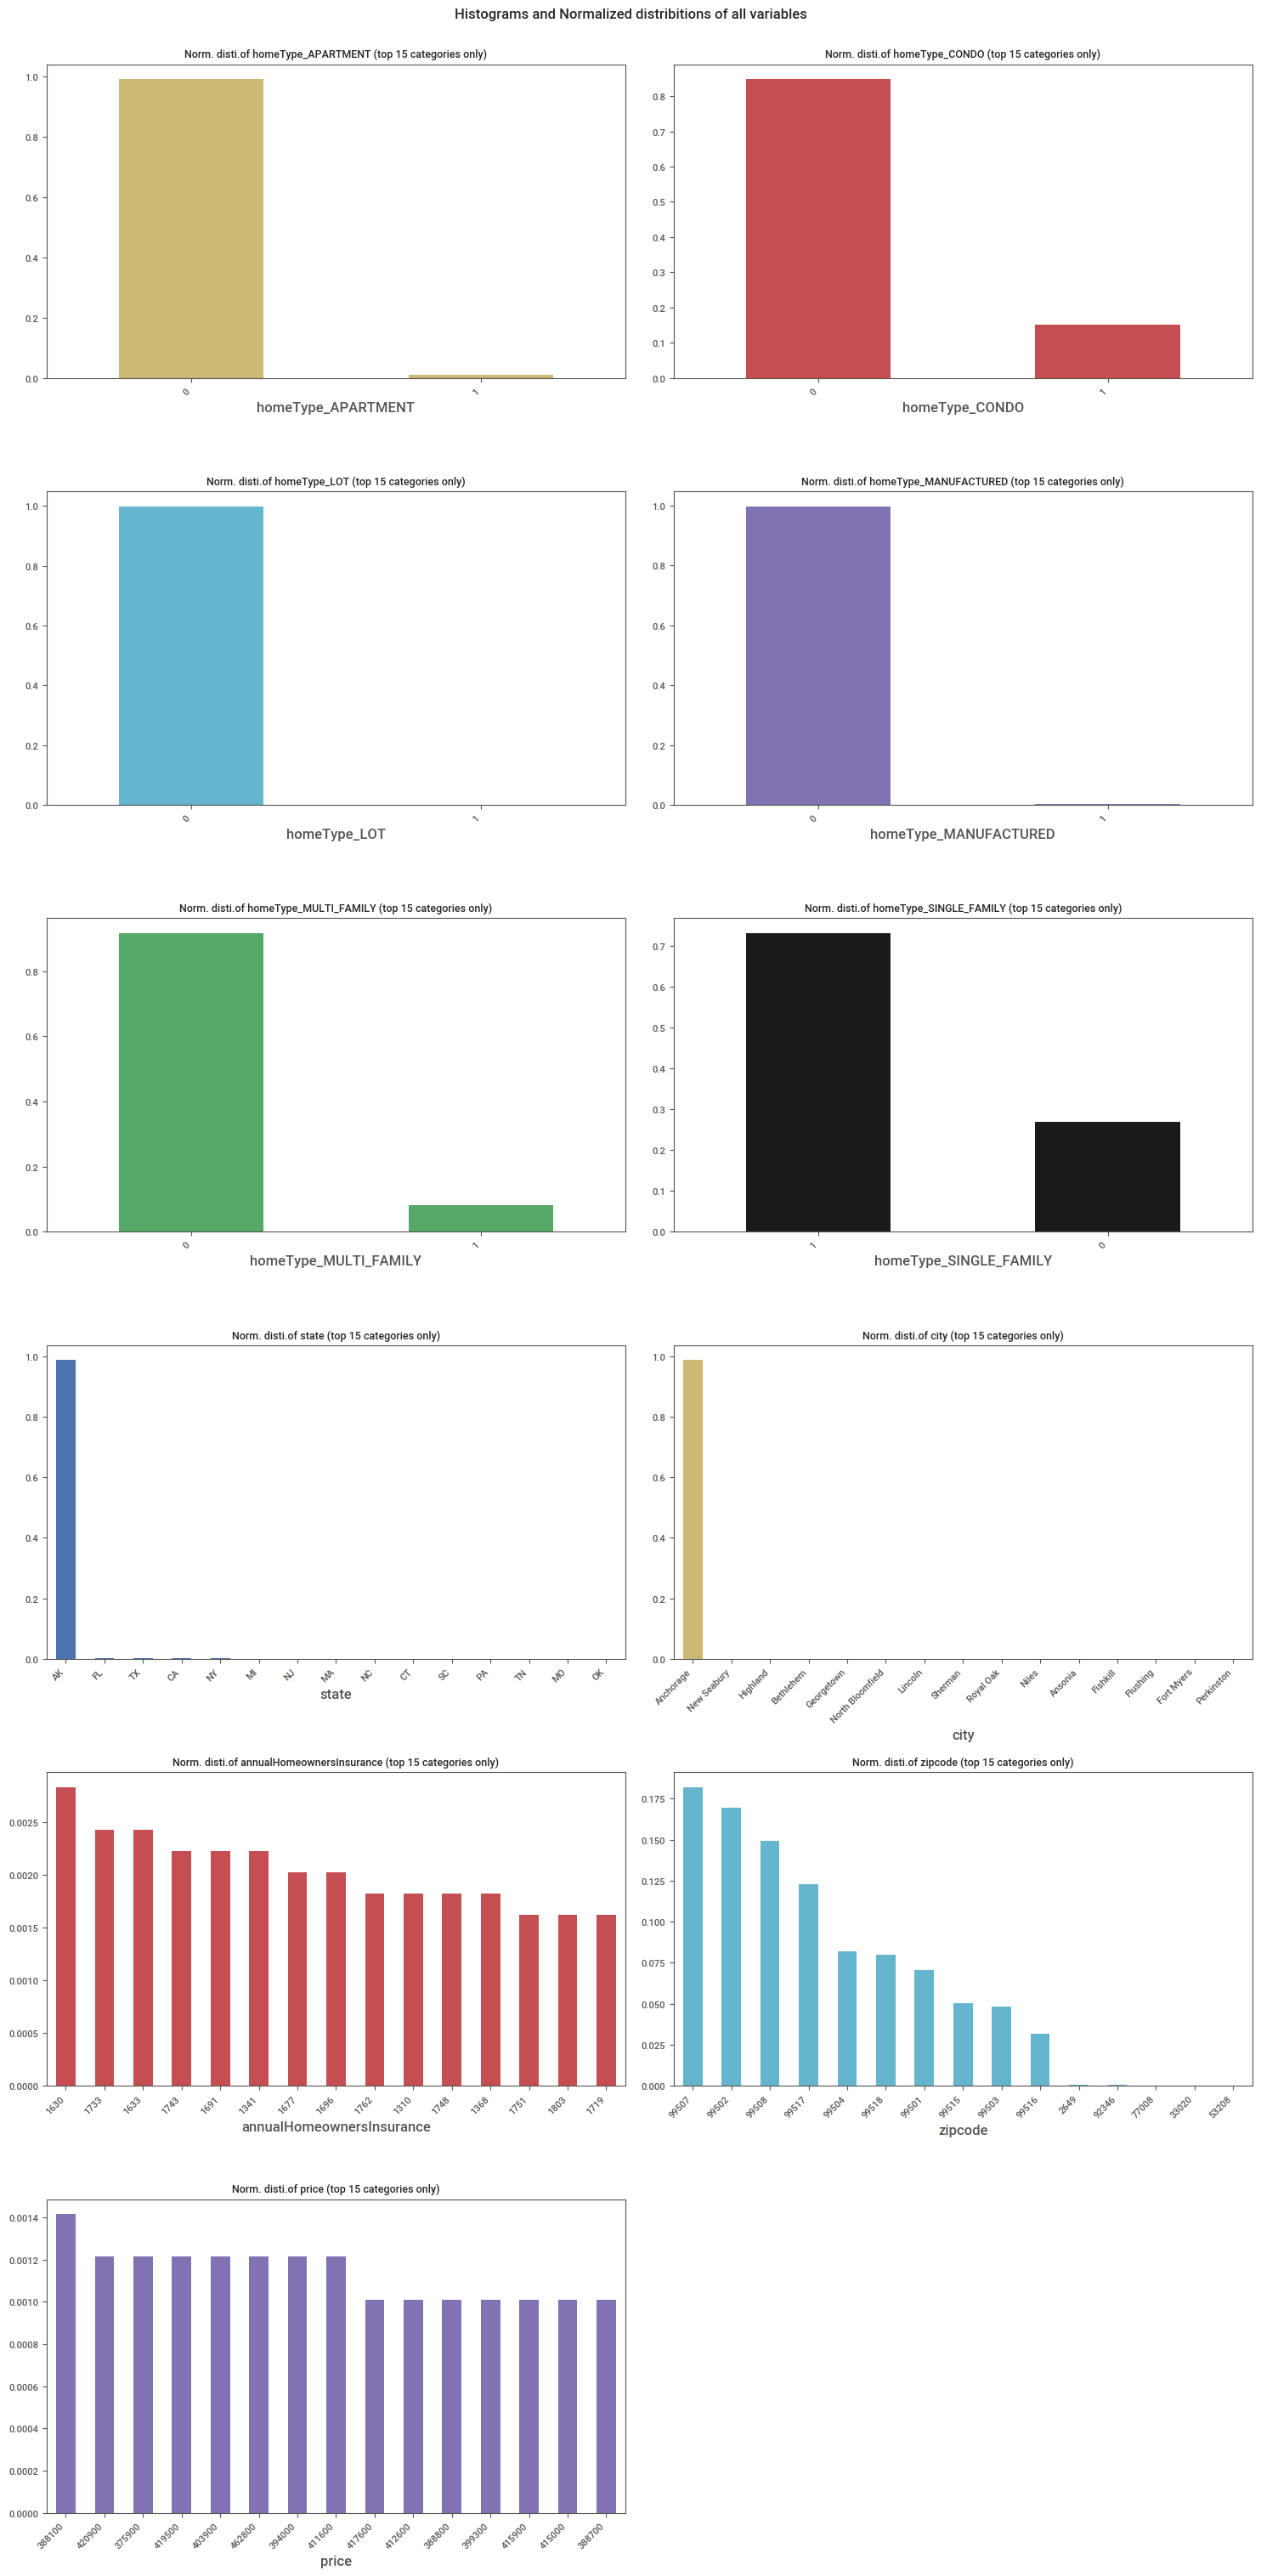

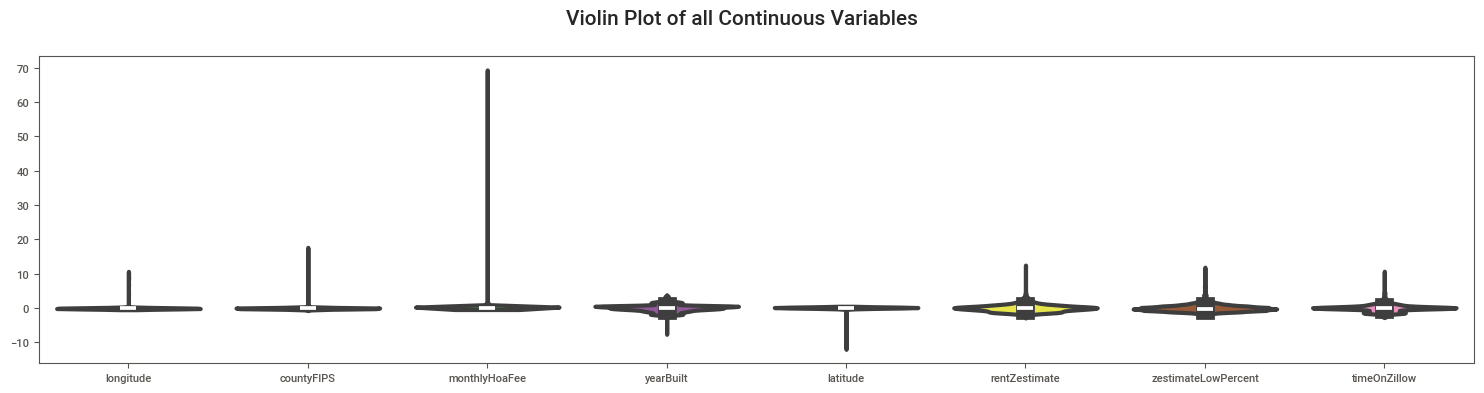

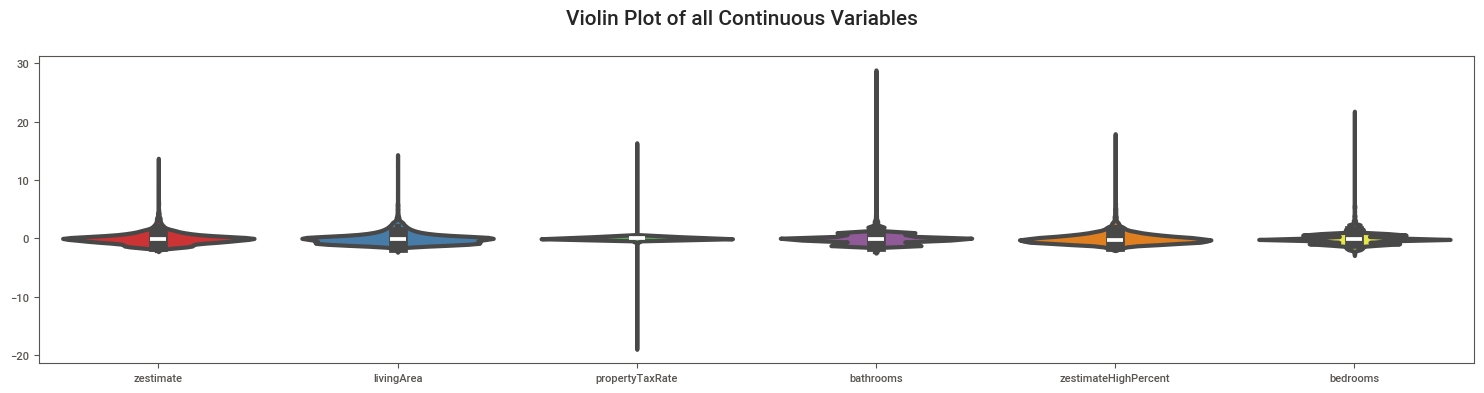

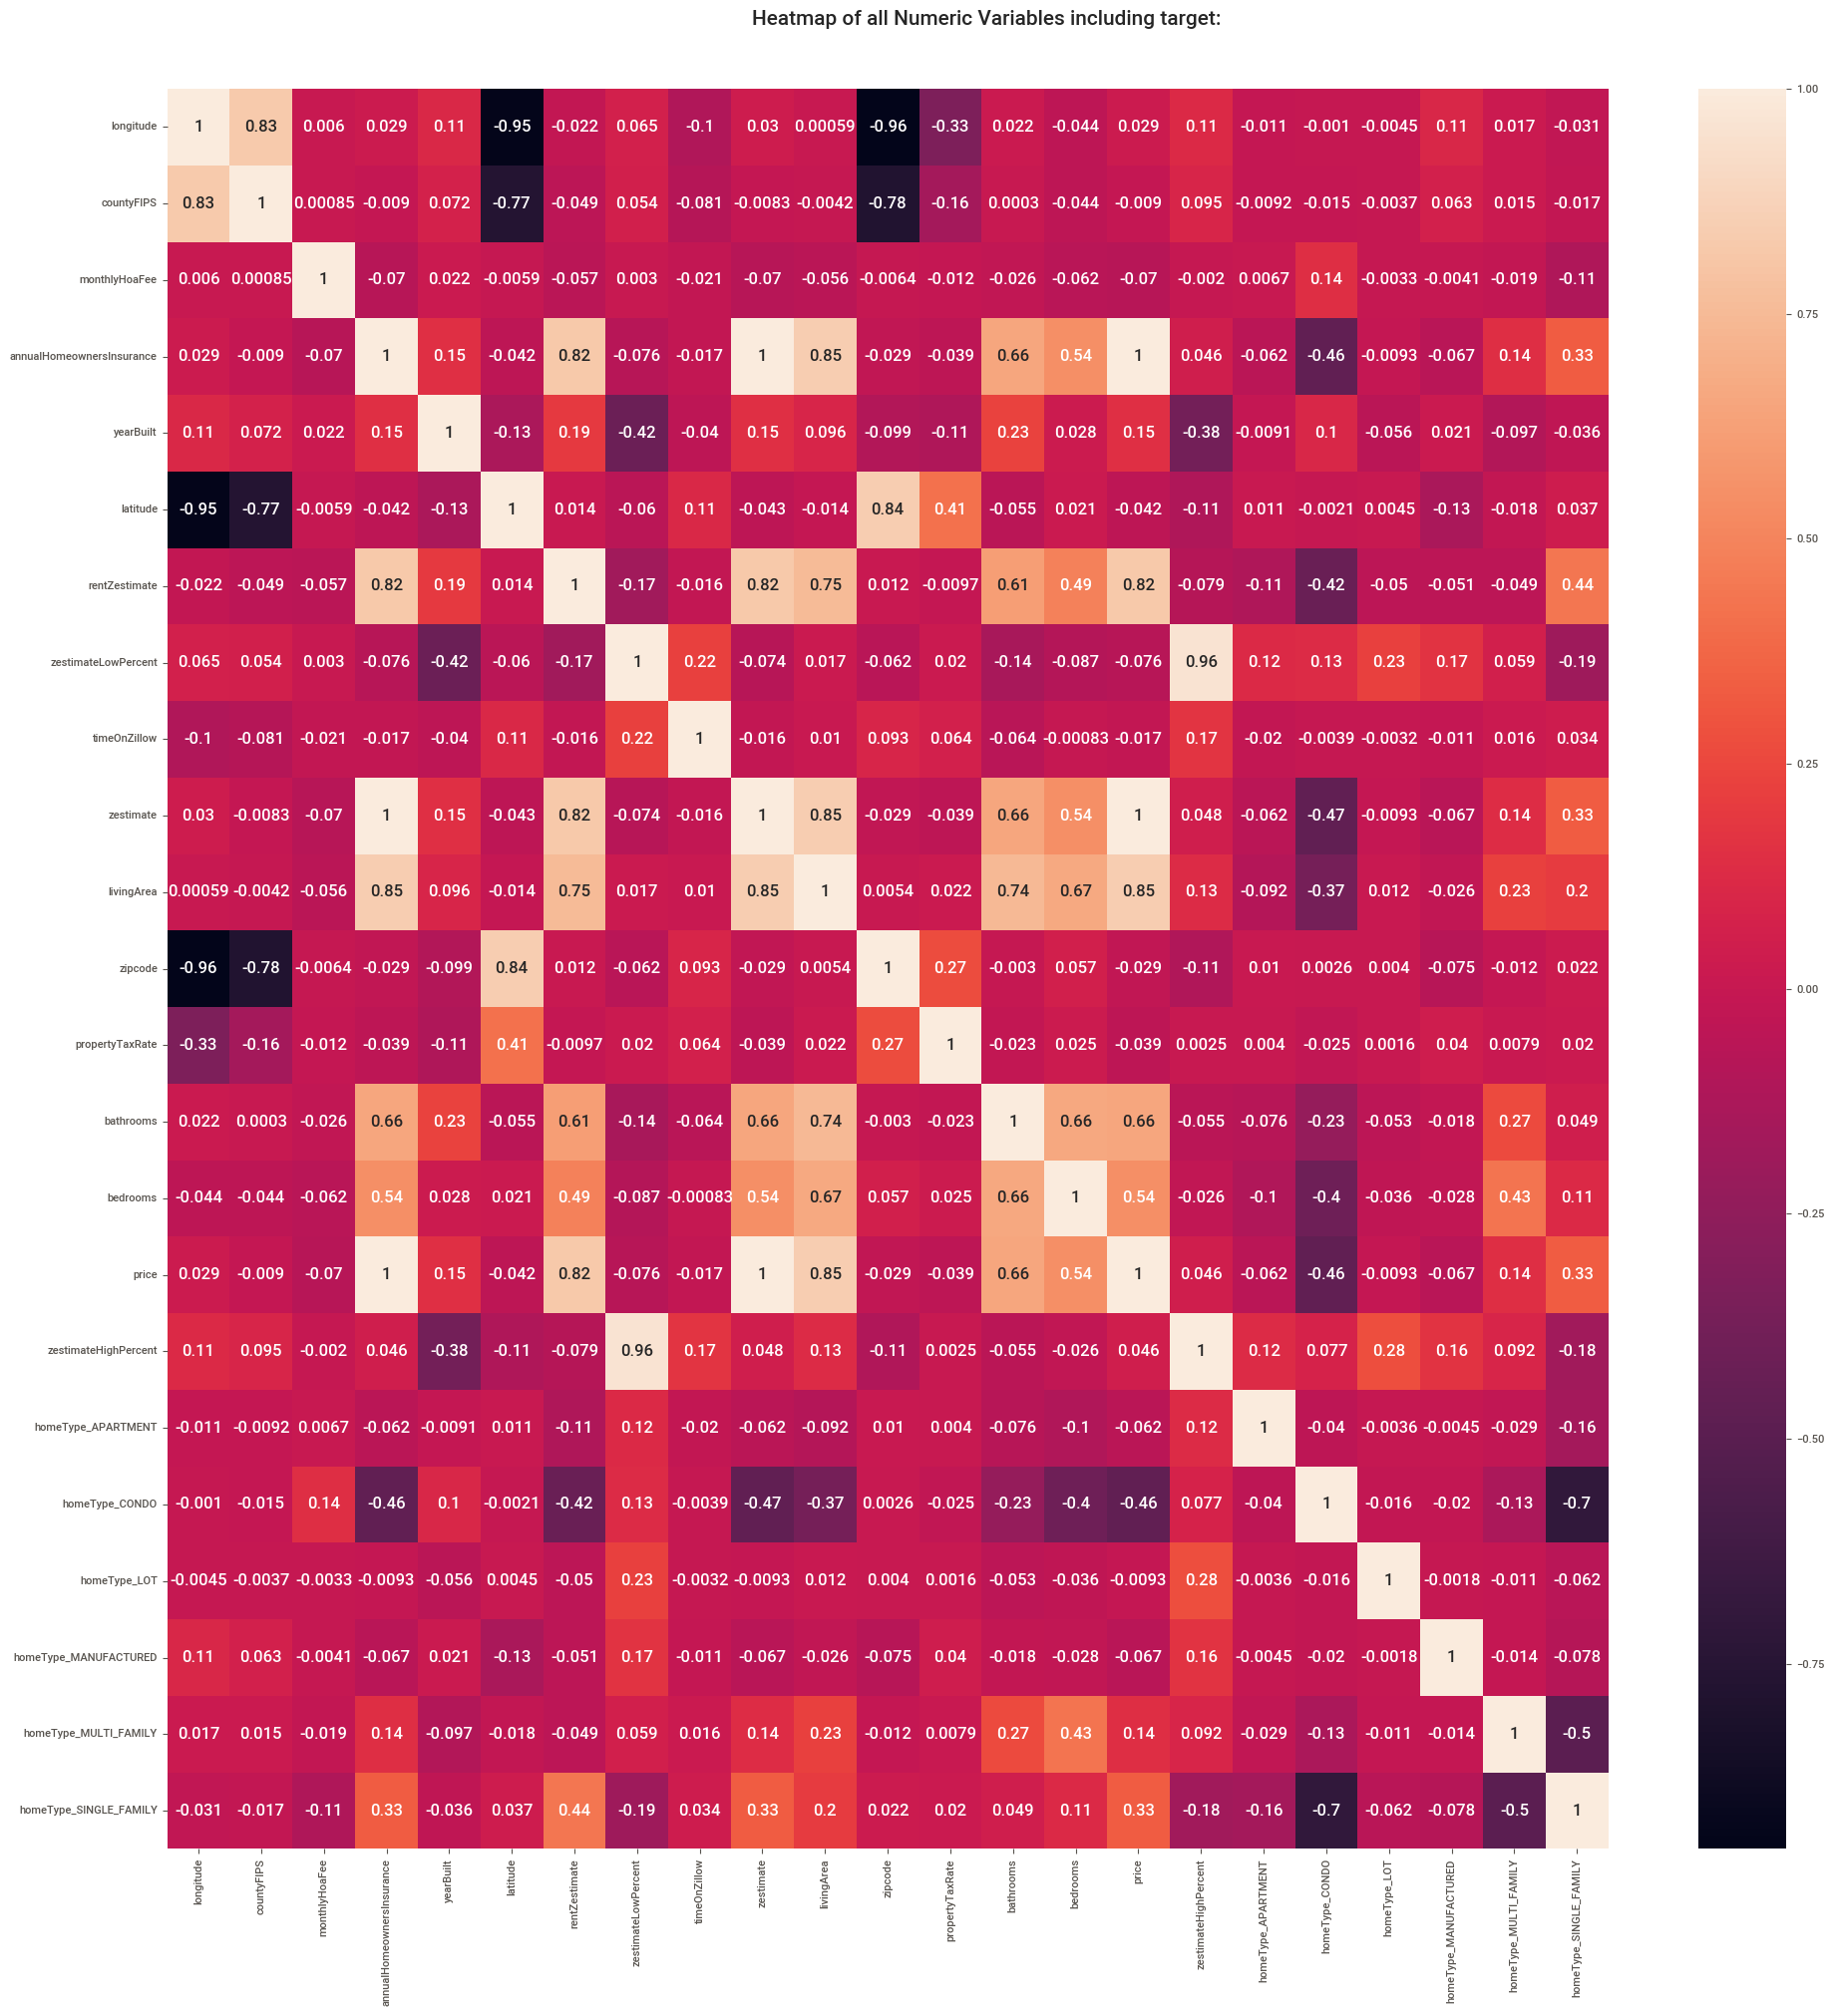

All Plots done
Time to run AutoViz = 92 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [30]:
AV = AutoViz_Class()
reg_av=report = AV.AutoViz("Clean_Zillow.csv")

In [1]:

report = AV.AutoViz("Clean_Zillow.csv", chart_format="bokeh", depVar="price")

NameError: name 'AV' is not defined

<b>SweetViz</b>

In [32]:
report=sv.analyze(df)
report.show_html('sv_Zillow.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_Zillow.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Phik-Matrix</b>

In [33]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['longitude', 'monthlyHoaFee', 'annualHomeownersInsurance', 'livingArea', 'zipcode', 'propertyTaxRate', 'bathrooms', 'bedrooms', 'price', 'homeType_CONDO', 'homeType_SINGLE_FAMILY', 'homeType_OTHER']


longitude  monthlyHoaFee  \
longitude                  1.000000        0.0        
monthlyHoaFee              0.000000        1.0        
annualHomeownersInsurance  0.337465        0.0        
livingArea                 0.314912        0.0        
zipcode                    0.926339        0.0        
propertyTaxRate            0.810424        0.0        
bathrooms                  0.294034        0.0        
bedrooms                   0.435881        0.0        
price                      0.337447        0.0        
homeType_CONDO             0.000000        0.0        
homeType_SINGLE_FAMILY     0.044140        0.0        
homeType_OTHER             0.060603        0.0        

                           annualHomeownersInsurance  livingArea   zipcode  \
longitude                          0.337465            0.314912   0.926339   
monthlyHoaFee                      0.000000            0.000000   0.000000   
annualHomeownersInsurance          1.000000            0.771645   0.167506   
livingArea                         0.771645            1.000000   0.000000   
zipcode                            0.167506            0.000000   1.000000   
propertyTaxRate                    0.291274            0.173078   0.895236   
bathrooms                          0.768607            0.717396   0.000000   
bedrooms                           0.676196            0.863763   0.000000   
price                              1.000000            0.771756   0.167464   
homeType_CONDO                     0.664526            0.419802   0.000000   
homeType_SINGLE_FAMILY             0.520473            0.290823   0.013744   
homeType_OTHER                     0.114281            0.174941   0.000000   

                           propertyTaxRate  bathrooms  bedrooms    price   \
longitude                     0.810424      0.294034   0.435881  0.337447   
monthlyHoaFee                 0.000000      0.000000   0.000000  0.000000   
annualHomeownersInsurance     0.291274      0.768607   0.676196  1.000000   
livingArea                    0.173078      0.717396   0.863763  0.771756   
zipcode                       0.895236      0.000000   0.000000  0.167464   
propertyTaxRate               1.000000      0.253630   0.240285  0.291252   
bathrooms                     0.253630      1.000000   0.900319  0.768607   
bedrooms                      0.240285      0.900319   1.000000  0.676241   
price                         0.291252      0.768607   0.676241  1.000000   
homeType_CONDO                0.052643      0.119463   0.270684  0.663667   
homeType_SINGLE_FAMILY        0.059162      0.077865   0.153457  0.519503   
homeType_OTHER                0.096594      0.293467   0.343377  0.114415   

                           homeType_CONDO  homeType_SINGLE_FAMILY  \
longitude                     0.000000            0.044140          
monthlyHoaFee                 0.000000            0.000000          
annualHomeownersInsurance     0.664526            0.520473          
livingArea                    0.419802            0.290823          
zipcode                       0.000000            0.013744          
propertyTaxRate               0.052643            0.059162          
bathrooms                     0.119463            0.077865          
bedrooms                      0.270684            0.153457          
price                         0.663667            0.519503          
homeType_CONDO                1.000000            0.888790          
homeType_SINGLE_FAMILY        0.888790            1.000000          
homeType_OTHER                0.212008            0.745145          

                           homeType_OTHER  
longitude                     0.060603     
monthlyHoaFee                 0.000000     
annualHomeownersInsurance     0.114281     
livingArea                    0.174941     
zipcode                       0.000000     
propertyTaxRate               0.096594     
bathrooms                     0.293467     
bedrooms                      0.343377     


<b>Data Prep</b>
<p> is done in Python 3.9 you can see the report in the html folder</p>

<h3>X/Y Tets</h3>

<b>X</b>

In [36]:
# everything else except the target variable
X = df.drop(["price","annualHomeownersInsurance"], axis=1)
#this got revisited after the correlation test, removed the 1 correlations

In [37]:
X.columns

Index(['longitude', 'monthlyHoaFee', 'livingArea', 'zipcode',
       'propertyTaxRate', 'bathrooms', 'bedrooms', 'homeType_CONDO',
       'homeType_SINGLE_FAMILY', 'homeType_OTHER'],
      dtype='object')

<b>Y Regression</b>

In [38]:
# have only the target variable here (dependent variable)
y = df['price']

In [39]:
# have only the target variable here (dependent variable)
# y_temp = df['price_range']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
# le = LabelEncoder()
# y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
# y = tf.keras.utils.to_categorical(y_enc)

<b>Shap</b>

In [40]:
%matplotlib inline

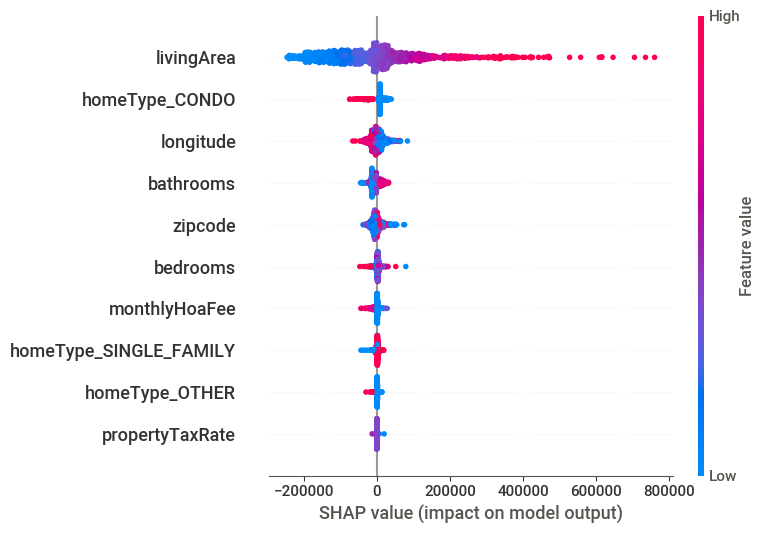

Feature Importances using SHAP:
          Feature           Importance  
0               longitude   12105.406985
1           monthlyHoaFee    3141.863161
2              livingArea  105776.912353
3                 zipcode    9335.918448
4         propertyTaxRate     222.019415
5               bathrooms    9453.807678
6                bedrooms    4278.730983
7          homeType_CONDO   15497.123923
8  homeType_SINGLE_FAMILY    2754.243322
9          homeType_OTHER    1668.706040


In [41]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, show=True)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

<Axes: >

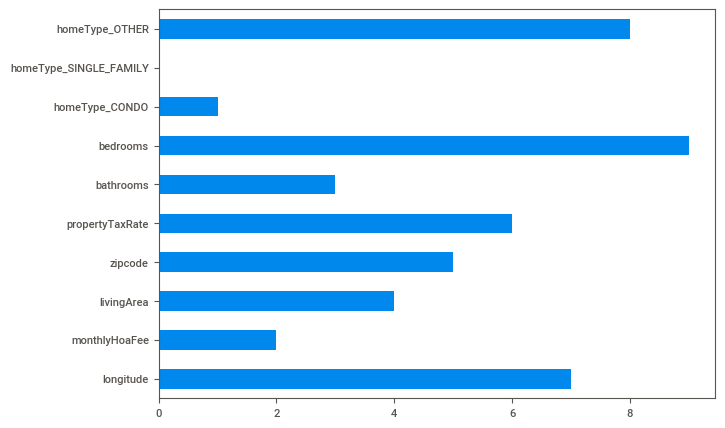

In [42]:
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

<b>lime</b>